## CFEP2. A criterion for committor

In the previous notebooks we showed that cut profiles can be used to compute the free energy profile and diffusion coefficient, as functions of an employed reaction coordinate, which completely specify the diffusive model of the dynamics. However such a model is useful only when its predictions are in agreement with the actual dynamics. 

Note that, usually, the dynamics of interest is complex. It is usually multidimensional and on a complex (free) energy landscape. To simplify the dynamics, one introduces reaction coordinates (RC) and constructs corresponding diffusive models of the dynamics. During such a dimensionality reduction, a lot of information is inevitably lost. Thus, one needs to select the putative RCs, in such an optimal way as to preserve the properties of interest. In particular, so that the diffusive models reproduce some important properties of the dynamics. We call such RCs - the optimal RCs. 

The committor function is an optimal coordinate. The diffusive model along the committor can be used to compute exactly the equilibrium flux, the mean first passage times, and the mean transition path times between any two points on the committor. It, thus, can be used to determine rigorously the following determinants of the reaction kinetics - the free energy barrier and the pre-exponential factor. 

Given two boundary states A and B, the committor function at point x is defined as $q(x)=p_B(x)$, the probability to reach boundary state B before reaching A. For protein folding, where one takes the denatured state as A and the folded state as B, the committor function is also known as folding probability or $p_{fold}$. 

Here we describe a criterion that can be used to validate that a putative RC closely approximate the committor function or to find the most suboptimal spatio-temporal regions - regions where the putative RC most differ from the committor. The criterion is based on $Z_{C,1}$ profiles computed for the ensemble of transition path segments [1].

### validation criterion
If the putative RC closely approximates the committor then $Z_{C,1}(x,\Delta t)=N_{AB}$ for all $x$ and $\Delta t$, where $N_{AB}$ equals to the number of transitions made by the RC time-series from boundary state A to B, $N_{AB}=N_{BA}$.

### optimality criterion
For sub-optimal RC time-series, $Z_{C,1}(x,\Delta t)$ generally is larger than $N_{AB}$. And, the larger the difference $Z_{C,1}(x,\Delta t_1)-Z_{C,1}(x,\Delta t_2)$ for $\Delta t_2> \Delta t_1$ the less optimal the RC time-series is around $x$.


<details>
<summary>

#### click here to see some more math
</summary>

Constancy of $Z_{C,1}(x,\Delta t)$ in the limit of small $\Delta t$, when the diffusive description is applicable follows from the following. The diffusion coefficient transforms due to the change of coordinate as $D(y)=D(x)(dy/dx)^2$. The partition function transforms as $Z_H(y)=Z_H(x)dx/dy$. Hence $Z_{C,1}(x)\sim Z_H(x)D(x)$ transforms as $Z_{C,1}(y)=Z_{C,1}(x)dy/dx$. For the committor one obtains $Z_{C,1}(q)=Z_{C,1}(x)dq/dx$, while the equation for the committor is $dq/dx\sim 1/Z_{C,1}(x)$, meaning $Z_{C,1}(q)=const$.

It also means that any RC r can be transformed to q(r), using $dq/dr\sim 1/Z_{C,1}(r)$, along which $Z_{C,1}=const$. For such transformed RC $q(r)$, $Z_C(q(r),\Delta t)=const$ for all small $\Delta t$, for which the diffusive approximation works. However, for suboptimal coordinate, $Z_C(q(r),\Delta t)\ne N_{AB}$, and at large $\Delta t$, when the diffusive approximation does not hold $Z_C(q(r),\Delta t)$ will no longer be constant. Thus it is important to consider all the time scales.

The necessity to consider the ensemble of transition path segments is due to the following. The constancy of $Z_{C,1}(x,\Delta t)$ follows from the equation on the committor $\sum_i[q(i)-q(j)]P(i|j,\Delta t)=0$, where $P(i|j,\Delta t)$ is the transition probability matrix. However this equation is not valid for boundary states A and B. And when contributions from transition to boundary states becomes notable $Z_{C,1}$ is no longer constant.

To illustrate the criterion, consider, again, diffusion in potential $U(x)=0.5\cos(\pi x)$ with force $f(x)=-dU/dx=\pi/2\sin(\pi x)$.

In [1]:
from math import sin,cos,pi,log,exp
from cfeplib import comp_diffusion_euler, comp_Zca
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def f(x):
    if abs(x)<2:return sin(x*pi)*pi*0.5
    return -x*100

def D(x):
    return 1

dt=0.0005
traj=comp_diffusion_euler(f,D,dt,2000000,isave=10)

The trajectory needs to be projected onto the committor. We will find the committor by using the diffusive approximation, namely, by numerically integrating $dq=dx/Z_{C,1}(x)$. We expect the diffusive approximation (for $Z_{C,1}$ too) to break down around the boundaries. Using a more rigorous approach, which employs Markov state models, one can avoid problems at the boundaries.  

In [3]:
from cfeplib import to_committor
lq=to_committor(traj,0.0001,-1,1)

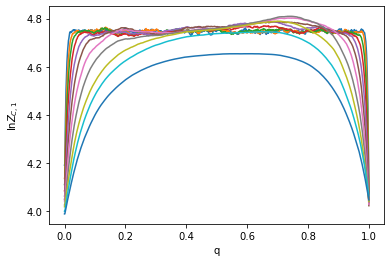

In [4]:
ldt=[2**i for i in range(11)]
dx=0.001
for dt in ldt:
    lx,lzc1=comp_Zca(lq,a=1,dx=dx,dt=dt)
    plt.plot(lx,np.log(lzc1))
plt.xlabel('q')
_=plt.ylabel('$\ln Z_{C,1}$')

It is more convenient to plot logarithm of $Z_{C,1}$.
As one can see, with increasing $\Delta t$, contributions of boundary effects become larger and spread to a larger area. For example, $Z_{C,1}$ for $\Delta t=2^{10}$ is significantly lower in the middle than that for $\Delta t=1$.  Without the boundary effects $Z_{C,1}$ stays constant. There are two ways to avoid the boundary effects [1]. The first is to remove the boundaries, by joining the putative RC with its mirrored copy [1]. The second is to use the ensemble of transition paths. We consider here the second. The rc time-series is divided into segments, which start and end at the specified boundary states A and B. Each segment is then continued forward by appending  the last boundary state for $\Delta t $ steps to the end of the segment. Analogously, each segment is continued backward by appending the first boundary state for $\Delta t$ steps to the start of the segment. $Z_{C,1}(x,\Delta t)$ is computed for the ensemble of all such segments.

We will use two functions from cfeplib. Function comp_ekn_tp decomposes trajectory on transition paths and computes the equilibrium kinetic network, i.e., $n_{ij}$ - the total number of transitions between positions $i$ and $j$. Function comp_Zca_ekn computes the cut profiles from the equilibrium kinetic network.

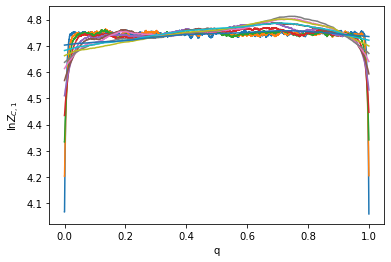

In [5]:
from cfeplib import comp_ekn_tp, comp_Zca_ekn
dx=0.0001
for dt in ldt:
    ekn=comp_ekn_tp(lq,x0=0,x1=1,dx=dx,dt=dt)
    lx,lzc1=comp_Zca_ekn(ekn,a=1)
    plt.plot(lx,np.log(lzc1))
plt.xlabel('q')
_=plt.ylabel('$\ln Z_{C,1}$')

As one can see, $Z_{C,1}$ are constant up to expected statistical fluctuations. Small deviations in the vicinity of boundaries are due to the break down of the diffusive approximations. For the committor function, computed by using the MSM approach, the profiles will be constant in the entire range. 

### Fraction of native contacts as reaction coordinate for protein folding

To illustrate a sub-optimal RC, we turn to a more realistic multidimensional example, of an atomistic protein folding trajectory, simulated by molecular dynamics. An often used RC to study protein folding is the fraction of native contact $Q$. It is high for the configurations in the native state and low for configuration in the denatured state. We consider this coordinate for the state-of-the-art MD simulation of HP35 double mutant protein (the pdb  index is 2f4k), reported by D. Shaw [2]. We investigate whether this coordinate is sufficiently optimal.



We first read this coordinate from the file 2f4k.npz, which contains various RCs for this protein, and build the corresponding free energy landscape.

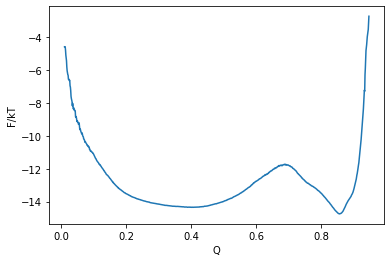

In [6]:
import numpy as np
lQ=np.load('2f4k.npz')['Q'] # reading Q time-series

lx,lzh=comp_Zca(lQ,a=-1,dx=0.001)
lf=[-log(zh) for zh in lzh]
plt.plot(lx,lf)
plt.ylabel('F/kT')
_=plt.xlabel('Q')

One can see two free energy minima - denatured ($Q<0.7$) and native ($Q>0.7$). To apply the optimality criterion to Q, we first transform it to committor $q(Q)$. We take as boundary states $Q\le 0.4$  and $Q\ge 0.85$.

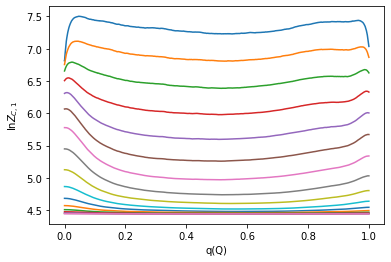

In [7]:
dx=0.0001
lq=to_committor(lQ,dx,0.4,0.85)
ldt=[2**i for i in range(17)]
for dt in ldt:
    ekn=comp_ekn_tp(lq,x0=0,x1=1,dx=dx,dt=dt)
    lx,lzc1=comp_Zca_ekn(ekn,a=1)
    plt.plot(lx,np.log(lzc1))
plt.xlabel('q(Q)')
_=plt.ylabel('$\ln Z_{C,1}$')

As one can see, the profiles change significantly with $\Delta t$, meaning that Q RC is far from optimal. From $Z_{C,1}\approx 1600$ for $\Delta t=1$ and $Z_{C,1}\approx 85$ for $\Delta t \rightarrow \infty$ it follows that kinetics estimated using diffusive model along $Q$ at $\Delta t=1$ will be $\approx 20$ times faster then actual kinetics. Second, dynamics projected on $Q$ will not be diffusive but rather subdiffusive, and thus one can not use the diffusive model.

Consider now the trajectory projected on a RC, which closely approximates the committor function. The RC was computed using a non-parametric approach as described in [1].

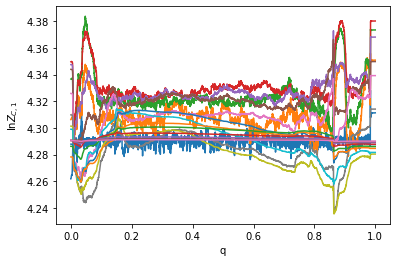

In [8]:
lq=np.load('2f4k.npz')['q']
dx=0.0001
ldt=[2**i for i in range(17)]
for dt in ldt:
    ekn=comp_ekn_tp(lq,x0=0,x1=1,dx=dx,dt=dt)
    lx,lzc1=comp_Zca_ekn(ekn,a=1)
    _=plt.plot(lx,np.log(lzc1))
plt.xlabel('q')
_=plt.ylabel('$\ln Z_{C,1}$')

As one can see the $Z_{C,1}$ profiles for the optimal RC are approximately constant upto expected statistical fluctuations (about 10%), which validates that the determined RC closely approximates the committor.

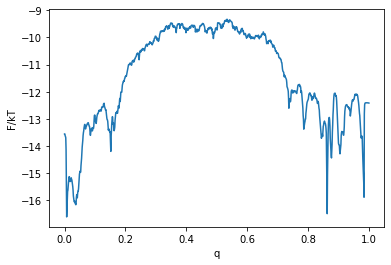

In [10]:
lx,lzh=comp_Zca(lq,a=-1,dx=0.001)
lf=[-log(zh) for zh in lzh]
plt.plot(lx,lf)
plt.ylabel('F/kT')
_=plt.xlabel('q')

The profile along this coordinate is much more informative. The diffusive model along this coordinate reproduces accurately the equilibrium flux, the mean first-passage times, and the mean transition-path times without any fitting [1].

### References

[1] S. V. Krivov, Protein Folding Free Energy Landscape along the Committor - the Optimal Folding Coordinate, [*Journal of Chemical Theory and Computation* 2018 **14** (7), 3418-3427](https://pubs.acs.org/doi/full/10.1021/acs.jctc.8b00101)

[2] Piana, S.; Lindorff-Larsen, K.; Shaw, D. E. Protein folding kinetics and thermodynamics from atomistic simulation. [*Proc. Natl. Acad. Sci. U. S. A.* 2012, **109**, 17845–17850](https://www.pnas.org/content/109/44/17845)